# Feed Forward Neural Networks

Feed-forward neural networks (FFNNs) are among the simplest and most fundamental types of artificial neural networks. They consist of an **input layer**, one or more **hidden layers**, and an **output layer**. In an FFNN, data flows strictly in one direction—from the input layer, through the hidden layers, to the output layer—hence the name **"feed-forward"**.

FFNNs are designed to model complex relationships between input and output data by **learning weights and biases** during the training process. The key idea behind FFNNs is to find a mapping from inputs to outputs by minimizing the **loss function**, which measures the difference between the network’s predictions and the actual target values.

These networks are versatile and can be used for various tasks, such as:
- **Regression:** Predicting continuous values, like house prices.
- **Classification:** Assigning input data to predefined categories, like classifying images of animals.
- **Feature Extraction:** Transforming raw data into more meaningful representations, like extracting features from text or images.

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Feed-Forward-Neural-Network.gif)

## Feed Forward Model Structure

### Key Components

In a feed-forward neural network, the structure is composed of several key components: the **input layer**, **hidden layers**, and the **output layer**. These components work together to transform raw input data into meaningful output predictions through a series of mathematical operations.

#### Input Layer:
The input layer is the initial stage of the network where raw data enters. Each neuron in the input layer corresponds to a feature from the dataset. For instance, if you are working with the Iris dataset, which contains four features (like petal length and petal width), the input layer would have four neurons.

The input layer itself does not perform any computation. Its primary function is to accept the feature values and pass them on to the next layer (the first hidden layer). Essentially, the input layer acts as a conduit that makes the data available to the network.

#### Hidden Layers:
The hidden layers form the intermediate steps between the input and output. They are called "hidden" because they do not directly interact with the input or output; instead, they process intermediate representations.

In a hidden layer, each neuron computes a **weighted sum** of the inputs it receives from the previous layer. This weighted sum is then passed through an **activation function** to introduce non-linearity. Non-linearity is crucial because it enables the network to learn complex patterns beyond simple linear relationships.

The hidden layers capture intricate correlations and interactions among features. As data moves through multiple hidden layers, the network progressively extracts higher-level features. For example:
- In image classification, the first hidden layer may detect edges, while deeper layers might detect shapes or objects.
- In natural language processing, initial layers might capture word-level patterns, while deeper layers understand sentence structures.

#### Output Layer:
The output layer is the final stage of the feed-forward network. It takes the transformed data from the last hidden layer and produces the final predictions. The number of neurons in the output layer depends on the nature of the problem:
- For **regression**, a single neuron may output a continuous value.
- For **binary classification**, one neuron outputs a probability (using a **sigmoid** function).
- For **multi-class classification**, multiple neurons output the probabilities for each class (using a **softmax** function).

The output from this layer represents the model's prediction. During training, the predicted output is compared with the true output using a loss function. The network adjusts its weights and biases to minimize this loss.



## Mathematical Formulation

In feed-forward neural networks, each layer performs a sequence of operations: linear transformation, non-linear activation, and an additional transformation in the output layer, if required.

#### Step 1: Linear Transformation (Hidden Layer)

The first step in each layer (after the input) is to perform a **linear transformation** on the data:

$$
z^{(1)} = X W_1 + b_1
$$

This equation represents the linear combination of inputs:
- $X$ is the **input matrix**, where each row represents an example and each column represents a feature.
- $W_1$ is the **weight matrix** for the hidden layer, which connects the input neurons to the hidden neurons.
- $b_1$ is the **bias vector**, which allows the model to better fit the data by shifting the activation function.

The purpose of this step is to project the input data into a new space defined by the weights. The weights determine how strongly each input influences the output. The bias adjusts the output independently of the inputs, allowing the model to fit data more flexibly.

#### Step 2: Activation Function (Hidden Layer)

After the linear transformation, we introduce **non-linearity** using an activation function:

$$
a^{(1)} = \sigma(z^{(1)})
$$

The activation function ($\sigma$) allows the model to learn complex patterns. Without non-linearity, the entire network would essentially be equivalent to a single linear transformation, regardless of how many layers were added.

#### Step 3: Linear Transformation (Output Layer)

The next step is to compute the output of the network:

$$
z^{(2)} = a^{(1)} W_2 + b_2
$$

This step works similarly to the first transformation but applies to the activations from the hidden layer instead of the raw inputs. It maps the non-linear feature representation to the output space.

#### Step 4: Activation Function (Output Layer)

The final transformation typically involves an activation function that matches the task:

$$
\hat{y} = \sigma(z^{(2)})
$$

For binary classification, this could be a **sigmoid** function, while for multi-class classification, it might be a **softmax** function. In regression tasks, the output layer might simply be linear.

## Single Layer Perceptron

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT_HUW3mYbYMnPZswcS6X_2jrWDnoSH3z79wA&s)

### Introduction to Single-Layer Perceptrons

The single-layer perceptron is one of the simplest types of neural networks, forming the foundation of feed-forward neural networks. It consists of:

- **An input layer** that takes features from the dataset.
- **A single hidden layer** where weighted sums of inputs are calculated and passed through an activation function (e.g., sigmoid) to introduce non-linearity.
- **An output layer** that provides the final predictions.

Mathematically, this looks like: 

$$
\hat{y} = \sigma(X W + b)
$$

Where:
- $X$ is the input data.
- $W$ is the weight vector.
- $b$ is the bias.
- $\sigma$ is the activation function.

Although a single-layer perceptron has limited expressiveness (it can only learn linearly separable patterns), it is an important step in understanding the basic operations of neural networks. Extending the concept to include multiple layers (multi-layer perceptrons) allows for the approximation of more complex, non-linear functions.


### Example Of A Single-Layer Perceptron

In [2]:
import numpy as np

In [43]:
# Define activation function (step function)
step_function = lambda x: np.where(x > 0, 1, 0)  # Binary step activation function

In [44]:
# Define model architecture
N, input_sz = 100, 50  # Number of samples, input size

w = np.random.rand(input_sz, 1)  # Weights for input to output
b = np.random.rand(1)  # Bias term

X = np.random.rand(N, input_sz)  # Random training input data
y = np.where(np.random.rand(N, 1) > 0.5, 1, 0)  # Random binary target values

In [45]:
# Training parameters
learning_rate = 0.01
epochs = 100

# Training loop
for epoch in range(epochs):
    # Forward pass
    z = X.dot(w) + b  # Linear transformation
    predictions = step_function(z)  # Apply step activation function
    
    # Compute error
    errors = y - predictions
    
    # Weight and bias updates (Perceptron Learning Rule)
    w += learning_rate * X.T.dot(errors)  # Update weights
    b += learning_rate * errors.sum()  # Update bias

In [46]:
# Calculate final accuracy
final_predictions = step_function(X.dot(w) + b)
accuracy = np.mean(final_predictions == y) * 100  # Percentage of correctly classified samples
misclassified_count = np.sum(final_predictions != y)

In [48]:
# Print summary
print(f"Final Accuracy: {accuracy:.2f}%")
print(f"Number of Misclassified Samples: {misclassified_count}")
print(f"\n")
print(f"Learned Weights (first 5):{w[:5].flatten()}")
print(f"Learned Bias: {b[0]:.4f}")

Final Accuracy: 57.00%
Number of Misclassified Samples: 43


Learned Weights (first 5):[-0.23764498  0.06879015  1.05068002 -0.3534701   1.27304205]
Learned Bias: 0.1541


## Two Layer Neural Network

A **Two Layer Neural Network** (also called a **Multi-Layer Perceptron (MLP)**) extends the single-layer perceptron by adding one hidden layer:

$$
z^{(1)} = X W_1 + b_1
$$

$$
a^{(1)} = \sigma(z^{(1)})
$$

$$
z^{(2)} = a^{(1)} W_2 + b_2
$$

$$
\hat{y} = \sigma(z^{(2)})
$$

The hidden layer allows the network to learn **non-linear mappings**, which makes it more powerful than a single-layer perceptron. This model can approximate complex functions, including those that are not linearly separable.

In [49]:
import numpy as np

In [50]:
# Define activation function and its derivative
sigmoid = lambda x: 1 / (1 + np.exp(-x))  # Sigmoid activation function
dsigmoid = lambda x: x * (1 - x)  # Derivative of sigmoid

In [51]:
# Define model architecture
N, input_sz, hidden_sz = 100, 50, 10  # Number of samples, input size, hidden layer size

w1 = np.random.rand(input_sz, hidden_sz)  # Weights for input to hidden layer
w2 = np.random.rand(hidden_sz, 1)  # Weights for hidden layer to output

X = np.random.rand(N, input_sz)  # Random training input data
y = np.where(np.random.rand(N, 1) > 0.5, 1, 0)  # Random binary target values (0 or 1)

In [52]:
# Training parameters
learning_rate = 1e-2  # Learning rate
epochs = 1000  # Number of training iterations

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden = sigmoid(X.dot(w1))  # Compute hidden layer outputs
    output = sigmoid(hidden.dot(w2))  # Compute final output predictions

    # Compute gradients
    grad_w2 = hidden.T.dot((output - y) * dsigmoid(output))  # Gradient for w2
    grad_w1 = X.T.dot(((output - y) * dsigmoid(output)).dot(w2.T) * dsigmoid(hidden))  # Gradient for w1

    # Gradient descent step
    w2 -= learning_rate * grad_w2
    w1 -= learning_rate * grad_w1

In [53]:
# Calculate final predictions and metrics
final_hidden = sigmoid(X.dot(w1))  # Hidden layer output
final_output = sigmoid(final_hidden.dot(w2))  # Final predictions
final_predictions = np.where(final_output > 0.5, 1, 0)  # Convert probabilities to binary outputs
accuracy = np.mean(final_predictions == y) * 100  # Accuracy percentage
misclassified_count = np.sum(final_predictions != y)  # Count misclassified samples

In [55]:
# Print summary
print(f"Final Accuracy: {accuracy:.2f}%")
print(f"Number of Misclassified Samples: {misclassified_count}")
print(f"\n")
print(f"Learned Weights w1 (first 5):\n{w1[:5, :2]}")  # Print a sample of w1 weights
print(f"Learned Weights w2 (first 5):{w2[:5].flatten()}")  # Print a sample of w2 weights

Final Accuracy: 52.00%
Number of Misclassified Samples: 48


Learned Weights w1 (first 5):
[[0.24364929 0.22247049]
 [0.26751557 0.24084542]
 [0.41123871 0.78321157]
 [0.8958381  0.37073347]
 [0.10388157 0.40481027]]
Learned Weights w2 (first 5):[-0.05760391  0.37057464 -0.40041812  0.25684652 -0.35307745]


## More Modern Coding Example

#### Import Libraries

In [76]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Prepare The Data

In [77]:
# Generate random binary classification data
np.random.seed(42)
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
y = (np.sum(X, axis=1) > 10).astype(int)  # Binary target: 1 if sum of features > 10, else 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Build And Compile The Model

In [88]:
# Build the two-layer neural network
model = Sequential([
    Dense(10, activation='relu', input_shape=(20,)),  # First hidden layer with 10 neurons
    Dense(5, activation='mish'),  # Second hidden layer with 5 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train The Model

In [89]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=True)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5380 - loss: 0.6869 - val_accuracy: 0.5312 - val_loss: 0.6918
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5081 - loss: 0.6889 - val_accuracy: 0.5250 - val_loss: 0.6909
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5125 - loss: 0.6877 - val_accuracy: 0.5063 - val_loss: 0.6900
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5342 - loss: 0.6846 - val_accuracy: 0.5188 - val_loss: 0.6892
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5334 - loss: 0.6836 - val_accuracy: 0.5312 - val_loss: 0.6883
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5361 - loss: 0.6808 - val_accuracy: 0.5312 - val_loss: 0.6875
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5543 - loss: 0.6766 - val_accuracy: 0.5312 - val_loss: 0.6865
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5478 - loss: 0.6809 - val_accuracy: 0.5375 - v

#### Evaluate The Model

In [81]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# # Predict and calculate accuracy manually
# y_pred = (model.predict(X_test) > 0.5).astype(int)
# print(f"Manual Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy: 0.62


## Real World Example - TensorFlow

#### Import Libraries

In [61]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

#### Load The Data

In [62]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

#### Prepare The Data

In [63]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#### Build And Compile The Model

In [64]:
# Build the two-layer neural network
model = Sequential([
    Dense(10, activation='relu', input_shape=(X.shape[1],)),  # First hidden layer with 10 neurons
    Dense(5, activation='relu'),  # Second hidden layer with 5 neurons
    Dense(3, activation='softmax')  # Output layer with 3 neurons for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/Users/jonathanschlosser/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train The Model

In [65]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4366 - loss: 1.0222 - val_accuracy: 0.5000 - val_loss: 0.9453
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6153 - loss: 0.8509 - val_accuracy: 0.8333 - val_loss: 0.8313
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7049 - loss: 0.7241 - val_accuracy: 0.8333 - val_loss: 0.7339
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8132 - loss: 0.5924 - val_accuracy: 0.7500 - val_loss: 0.6397
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8247 - loss: 0.5026 - val_accuracy: 0.7500 - val_loss: 0.5586
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8576 - loss: 0.4193 - val_accuracy: 0.7500 - val_loss: 0.4926
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8506 - loss: 0.3463 - val_accuracy: 0.7500 - val_loss: 0.4799
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8259 - loss: 0.3057 - val_accuracy: 0.7917 - val_loss: 0.4824


#### Evaluate The Model

In [67]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict and calculate accuracy manually
# y_pred = np.argmax(model.predict(X_test), axis=1)
# y_true = np.argmax(y_test, axis=1)
# print(f"Manual Accuracy: {accuracy_score(y_true, y_pred):.2f}")

Test Accuracy: 0.97


In [68]:
results = model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(model.metrics_names, results):
    print(f"{name.capitalize():<10}: {value:.4f}")

Loss      : 0.0504
Compile_metrics: 0.9667


In [69]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nSklearn Metrics:")
print(f"  Accuracy      : {accuracy_score(y_true, y_pred):.4f}")
print(f"  Precision (m) : {precision_score(y_true, y_pred, average='macro'):.4f}")
print(f"  Recall    (m) : {recall_score(y_true, y_pred, average='macro'):.4f}")
print(f"  F1 Score  (m) : {f1_score(y_true, y_pred, average='macro'):.4f}\n")

print("Classification Report:")
print(classification_report(y_true, y_pred, digits=4))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Sklearn Metrics:
  Accuracy      : 0.9667
  Precision (m) : 0.9722
  Recall    (m) : 0.9630
  F1 Score  (m) : 0.9659

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    0.8889    0.9412         9
           2     0.9167    1.0000    0.9565        11

    accuracy                         0.9667        30
   macro avg     0.9722    0.9630    0.9659        30
weighted avg     0.9694    0.9667    0.9664        30

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


## Real World Example - PyTorch

#### Import Libraries

In [70]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#### Load The Data

In [71]:
iris = load_iris()
X = iris.data                         
y = iris.target.reshape(-1, 1)         

#### Prepare The Data

In [72]:
# One-Hot Encode Target
enc = OneHotEncoder(sparse_output=False)
y_oh = enc.fit_transform(y)

# Scale The Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_tr, X_te, y_tr, y_te = train_test_split(
    X_scaled, y_oh, test_size=0.2, random_state=42, stratify=y)

# Convert To Torch Tensors
X_tr = torch.tensor(X_tr, dtype=torch.float32)
y_tr = torch.tensor(y_tr, dtype=torch.float32)
X_te = torch.tensor(X_te, dtype=torch.float32)
y_te = torch.tensor(y_te, dtype=torch.float32)

#### Build And Compile The Model

In [73]:
# Declare The Model Structure
model = nn.Sequential(
    nn.Linear(4, 10),    # first hidden layer
    nn.ReLU(),
    nn.Linear(10, 5),    # second hidden layer
    nn.ReLU(),
    nn.Linear(5, 3),     # output layer
    nn.Softmax(dim=1)    # match Keras’s softmax
)

# Set Up Loss And Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

#### Train The Model

In [74]:
batch_size = 16
for epoch in range(50):
    # manually shuffle & batch
    perm = torch.randperm(len(X_tr))
    for i in range(0, len(X_tr), batch_size):
        idx = perm[i:i+batch_size]
        xb, yb = X_tr[idx], y_tr[idx]

        optimizer.zero_grad()
        y_pred = model(xb)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()

#### Evaluate The Model

In [75]:
with torch.no_grad():
    y_pred = model(X_te)
    acc = (y_pred.argmax(dim=1) == y_te.argmax(dim=1)).float().mean()
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.97


## Activation Functions

In neural networks, **activation functions** determine how the weighted sum of inputs from one layer is transformed before being passed to the next layer. They introduce non-linearity into the model, enabling neural networks to learn complex patterns and approximate non-linear functions.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Sigmoid Function

#### Definition

The sigmoid function maps input values to a range between 0 and 1. It is commonly used for probabilistic tasks, such as binary classification, where the output represents a probability:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

#### Properties

- Output range: $ (0, 1) $
- Commonly used in the output layer for binary classification problems.
- **Limitations**:
    - Vanishing gradient problem for large or small inputs (gradients approach 0 as $ x \to \pm\infty $).
    - Can saturate, slowing down learning.


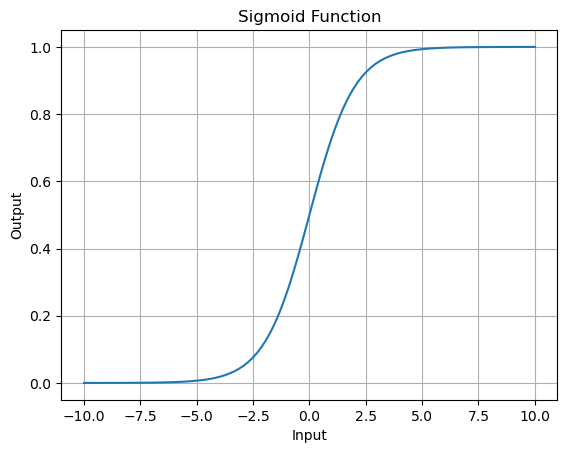

In [49]:
# Define sigmoid function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Generate data and compute sigmoid
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# Plot sigmoid
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### Softmax Function

#### Definition  
The softmax function takes a vector of real numbers and transforms it into a probability distribution, where each output value lies in the range \((0,1)\) and the total sums to 1:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

where $K$ is the number of classes.

#### Properties
- Output range: $(0, 1)$ for each class  
- Outputs sum to 1, making them interpretable as probabilities across multiple classes  
- Commonly used in the output layer for **multiclass classification** problems  
- **Advantages**:
    - Normalizes outputs into a valid probability distribution  
    - Allows for multi-class decisions  
- **Limitations**:
    - Sensitive to very large input values (can cause numerical instability, often mitigated by subtracting the max value of \(z\) before exponentiation)  


Softmax Output: [0.65900114 0.24243297 0.09856589]
Sum of probabilities: 1.0


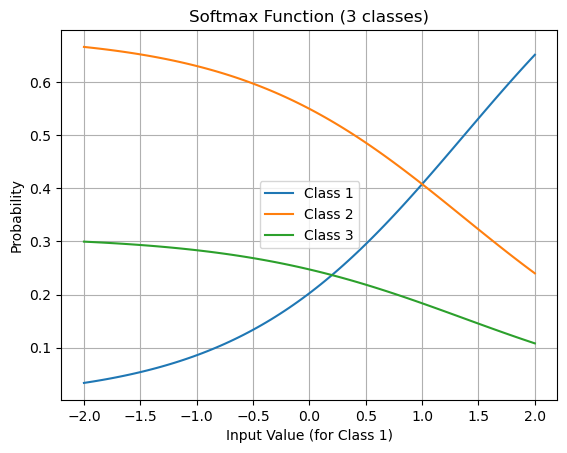

In [5]:
# Define softmax function
def softmax(x):
    # subtract max(x) for numerical stability
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Example: 3-class input values
x = np.array([2.0, 1.0, 0.1])
y = softmax(x)

print("Softmax Output:", y)
print("Sum of probabilities:", np.sum(y))

# Visualize softmax across a range
X = np.linspace(-2, 2, 100)
scores = np.vstack([X, np.ones_like(X), 0.2 * np.ones_like(X)])
Y = np.array([softmax(s) for s in scores.T])

plt.plot(X, Y[:,0], label="Class 1")
plt.plot(X, Y[:,1], label="Class 2")
plt.plot(X, Y[:,2], label="Class 3")
plt.title("Softmax Function (3 classes)")
plt.xlabel("Input Value (for Class 1)")
plt.ylabel("Probability")
plt.legend()
plt.grid()
plt.show()

### Tanh Function

#### Definition

The tanh function outputs values between $-1$ and $1$, making it symmetric around zero. This makes it preferable for inputs where zero-centered output is desirable.

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

#### Properties

- Output range: $(-1, 1)$
- Commonly used in hidden layers.
- **Advantages**:
  - Zero-centered output helps gradient-based optimization converge faster.
- **Limitations**:
  - Still suffers from the vanishing gradient problem.


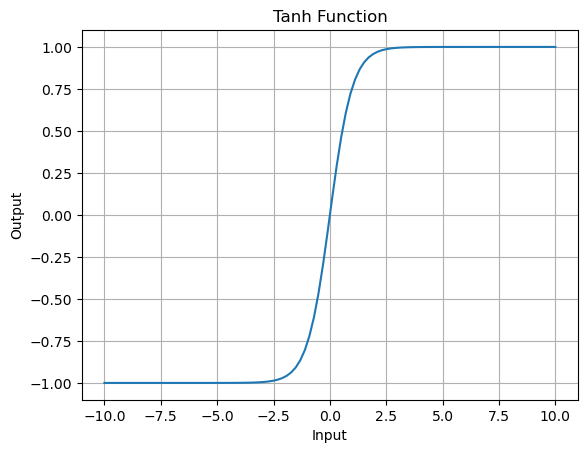

In [50]:
# Define tanh function
tanh = lambda x: np.tanh(x)

# Generate data and compute tanh
x = np.linspace(-10, 10, 100)
y = tanh(x)

# Plot tanh
plt.plot(x, y)
plt.title("Tanh Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### ReLU (Rectified Linear Unit)

#### Definition

ReLU outputs the input directly if it is positive; otherwise, it outputs zero. It is the most commonly used activation function in hidden layers due to its simplicity and effectiveness.

$$
\text{ReLU}(x) = \max(0, x)
$$

#### Properties

- Output range: $[0, \infty)$
- **Advantages**:
  - Computationally efficient.
  - Reduces the vanishing gradient problem compared to sigmoid and tanh.
- **Limitations**:
  - Can suffer from the **"dead neuron" problem** (neurons output zero for all inputs if gradients become zero).


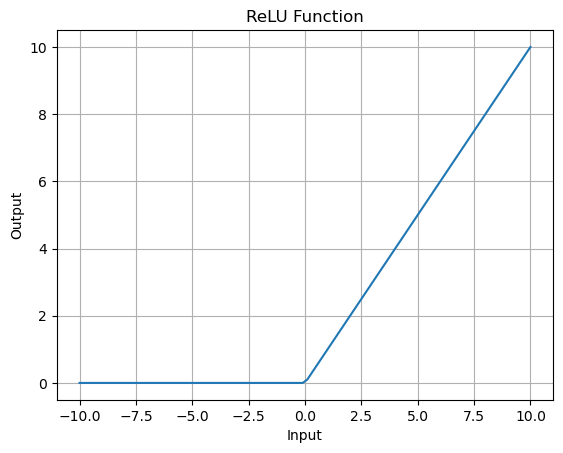

In [51]:
# Define ReLU function
relu = lambda x: np.maximum(0, x)

# Generate data and compute ReLU
x = np.linspace(-10, 10, 100)
y = relu(x)

# Plot ReLU
plt.plot(x, y)
plt.title("ReLU Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

### Leaky ReLU

#### Definition

Leaky ReLU modifies ReLU by allowing a small, non-zero gradient for negative inputs, preventing neurons from "dying."

$$
\text{Leaky ReLU}(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

Here, $ \alpha $ is a small constant (e.g., 0.01).

#### Properties

- Output range: $ (-\infty, \infty) $
- **Advantages**:
  - Mitigates the dead neuron problem.
- **Limitations**:
  - Introduces an additional hyperparameter ($ \alpha $).


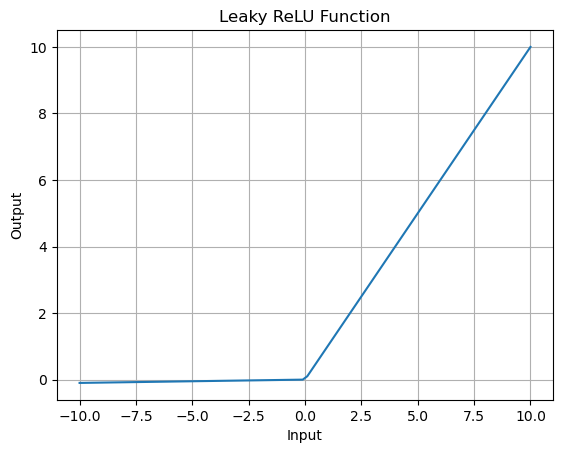

In [52]:
# Define Leaky ReLU function
leaky_relu = lambda x, alpha=0.01: np.where(x > 0, x, alpha * x)

# Generate data and compute Leaky ReLU
x = np.linspace(-10, 10, 100)
y = leaky_relu(x)

# Plot Leaky ReLU
plt.plot(x, y)
plt.title("Leaky ReLU Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

## Universal Approximation Theorem

The **Universal Approximation Theorem** states that a feed-forward neural network with **a single hidden layer**, containing a **finite number of neurons**, and a **non-linear activation function**, can approximate any continuous function to any desired level of accuracy on a compact domain. This demonstrates the power of neural networks to model highly complex relationships.

#### Key Concepts:
1. **Non-Linear Activation**:
   - Non-linear activation functions (e.g., sigmoid, tanh, ReLU) are essential. Without them, the network would behave as a simple linear model, unable to capture non-linear relationships.
   
2. **Single Hidden Layer**:
   - While a single hidden layer can theoretically approximate any continuous function, in practice, deep networks with multiple layers are more efficient at learning and require fewer neurons.

3. **Approximation vs. Generalization**:
   - The theorem guarantees the ability to approximate functions but does not address whether the network generalizes well to unseen data. This depends on factors like training data, optimization, and regularization.

#### Practical Implications:
Although the theorem provides a theoretical foundation, real-world neural networks often employ **deep architectures** (multiple hidden layers) to achieve better performance, especially in tasks like image recognition and natural language processing. Stacking layers enables the network to learn hierarchical representations, making it more efficient and scalable for complex problems.

This theorem underscores why neural networks are such powerful tools, capable of solving a vast range of problems, as long as they are well-designed and trained properly.
